In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

In [2]:
zip_file_path = 'preprocessed.csv.zip'

with ZipFile(zip_file_path) as z:
    with z.open('preprocessed_data.csv') as f:
        df = pd.read_csv(f)

df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_hour,is_weekend,fare_per_km,distance_band
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,Monday,17,0,4.365694,short
1,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,Saturday,4,1,2.750717,short
2,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,Tuesday,7,0,2.651118,short
3,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807,2012,11,20,Tuesday,20,0,4.820650,short
4,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232,2012,12,3,Monday,13,0,7.181434,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44799566,2012-08-28 16:32:00.000000140,10.9,2012-08-28 16:32:00+00:00,-73.981787,40.779525,-73.976405,40.751000,6,3.204058,2012,8,28,Tuesday,16,0,3.401936,medium
44799567,2012-05-29 17:03:00.000000175,14.9,2012-05-29 17:03:00+00:00,-73.996188,40.725842,-73.946020,40.700277,6,5.095098,2012,5,29,Tuesday,17,0,2.924379,medium
44799568,2015-02-19 00:32:56.0000002,17.0,2015-02-19 00:32:56+00:00,-73.982857,40.744808,-73.915627,40.759079,6,5.881252,2015,2,19,Thursday,0,0,2.890541,medium
44799569,2011-10-13 22:54:00.000000192,10.9,2011-10-13 22:54:00+00:00,-73.992933,40.723102,-73.963425,40.757462,6,4.558269,2011,10,13,Thursday,22,0,2.391258,medium


In [3]:
df.keys()

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance_km', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_dayofweek', 'pickup_hour', 'is_weekend',
       'fare_per_km', 'distance_band'],
      dtype='object')

Hypothesis tests

1st Hypothesis --> Mean fare per km is same on weekdays and weekends

Null Hypothesis (H0): The mean fare per kilometer on weekends is nearly same as weekdays.

Alternative Hypothesis (H1): The mean fare per kilometer on weekdays is different from on weekends and there is significant difference.

We would be using z-test to check this hypothesis

Experiment:  The Z-test experiment to test validity of this hypothesis

Reasoning:  
1) Large Sample Size & we can easily calculate the Standard Deviation of  fare across a given group of days
2) Weekdays and weekends are two independent set

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


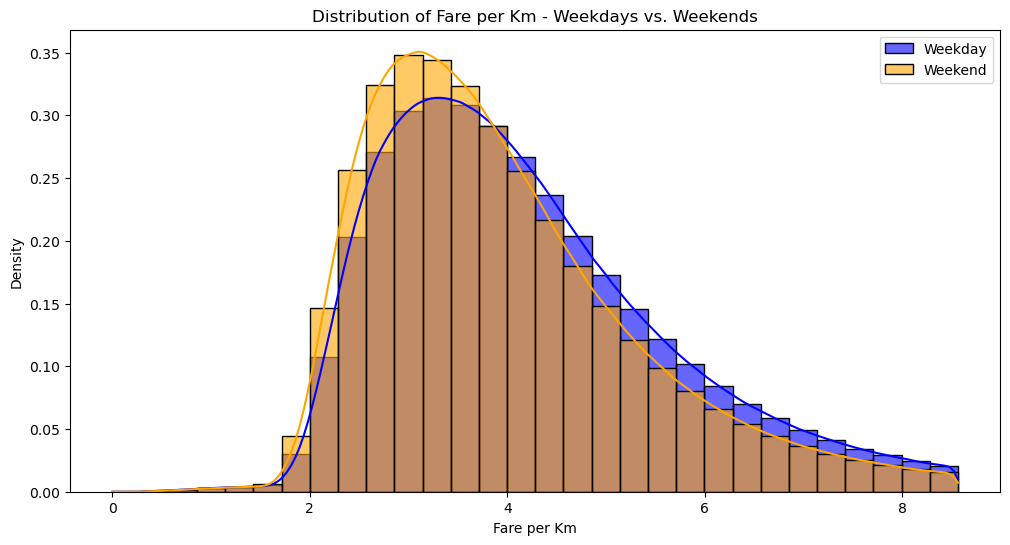

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the fare_per_km values for weekdays and weekends
weekdays_fare = df[df['is_weekend'] == 0]['fare_per_km']
weekends_fare = df[df['is_weekend'] == 1]['fare_per_km']

# Plot the histogram with KDE for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.histplot(weekdays_fare, color='blue', label='Weekday', kde=True, bins=30, stat='density', alpha=0.6)
sns.histplot(weekends_fare, color='orange', label='Weekend', kde=True, bins=30, stat='density', alpha=0.6)
plt.title('Distribution of Fare per Km - Weekdays vs. Weekends')
plt.xlabel('Fare per Km') 
plt.ylabel('Density')
plt.legend()
plt.show()


This already shows that Null Hypothesis is wrong, let's just check this via code.

In [5]:
import numpy as np
from scipy.stats import norm

# Separate the fare_per_km values for weekdays and weekends
weekdays_fare = df[df['is_weekend'] == 0]['fare_per_km'].tolist()
weekends_fare = df[df['is_weekend'] == 1]['fare_per_km'].tolist()

d_fare = [x for x in weekdays_fare if x >0]
e_fare = [x for x in weekends_fare if x >0]

# Calculate the mean and standard deviation for each group
mean_weekdays = np.mean(d_fare)
mean_weekends = np.mean(e_fare)
std_weekdays = np.std(d_fare, ddof=1)
std_weekends = np.std(e_fare, ddof=1) 

# Calculate the sample sizes
n_weekdays = len(d_fare)
n_weekends = len(e_fare)

# Calculate the pooled standard error
pooled_std_error = np.sqrt((std_weekdays**2 / n_weekdays) + (std_weekends**2 / n_weekends))

# Calculate the Z-statistic
z_stat = (mean_weekdays - mean_weekends) / pooled_std_error

# Calculate the p-value from the Z-statistic (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Output the result
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant
alpha = 0.05  # common threshold for significance
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in mean fare per km between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference in mean fare per km between weekdays and weekends.")


Z-statistic: 499.80035565158494
P-value: 0.0
Reject the null hypothesis (H0). There is a significant difference in mean fare per km between weekdays and weekends.


In [6]:
print(mean_weekdays, mean_weekends,std_weekdays,std_weekends)

4.160847234952507 3.934771801529899 1.4137498593531332 1.3498875259826768


As shown via above code, Null hypothesis is rejected. 

So it shows that is_weekend has a significant amount on fareamount keeping distance papameter constant. 

takeaways>

1) Pattern of cab booking across the week
2) Revenue Distribution

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

2nd Hypothesis --> Independence Between Passenger Count and Day of the Week

Null Hypothesis (H0): Passenger count and day of the week are independent.

Alternative Hypothesis (H1): Passenger count and day of the week are not independent.


We would be using Chi-square test to check this hypothesis

Experiment:  The χ2 test experiment to test validity of this hypothesis

Reasoning:  

1) The chi-squared test is used for the association between categorical variables (Passenger Count & Day of the week).
2) It compares observed frequencies with expected frequencies to check the relationship between variables

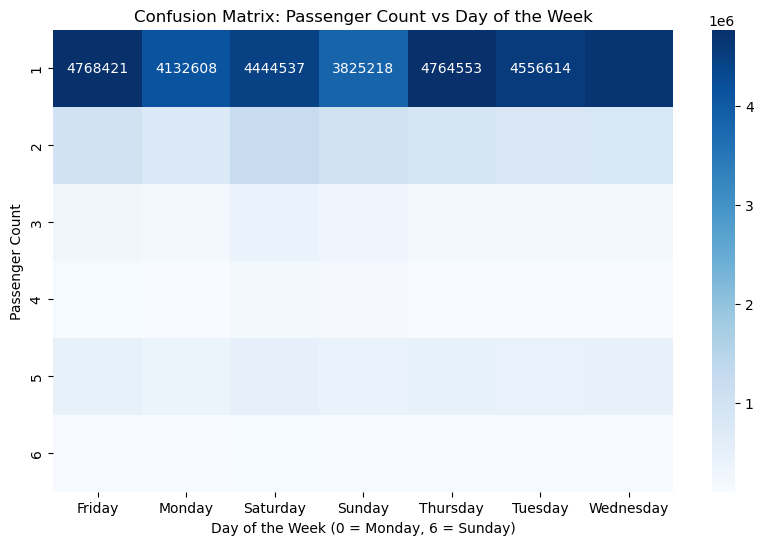

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix (contingency table) for passenger count vs. day of the week
confusion_matrix = pd.crosstab(df['passenger_count'], df['pickup_dayofweek'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Passenger Count vs Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Passenger Count')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Create the contingency table - showing counts for each combination of passenger_count and pickup_dayofweek.
contingency_table = pd.crosstab(df['passenger_count'], df['pickup_dayofweek'])

#Calculate row and column totals
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
total = contingency_table.values.sum()

# Expected frequencies -> (row * column)/count
expected = np.outer(row_totals, col_totals) / total

# Chi-Square test statistic
observed = contingency_table.values
chi_square_statistic = ((observed - expected) ** 2 / expected).sum()

# Degrees of freedom -> (row - 1) * (column - 1)
num_rows, num_cols = contingency_table.shape
degrees_of_freedom = (num_rows - 1) * (num_cols - 1)

# Determine the p-value
p_value = 1 - chi2.cdf(chi_square_statistic, degrees_of_freedom)

alpha = 0.05

print("Chi-Square Test Statistic:", chi_square_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between passenger count and day of the week.")
else:
    print("Fail to reject the null hypothesis: Passenger count and day of the week are independent.")


Chi-Square Test Statistic: 314274.3328857031
Degrees of Freedom: 30
P-value: 0.0
Reject the null hypothesis: There is a significant association between passenger count and day of the week.


As shown via above code, Null hypothesis is rejected. 

Therefore, passenger count and day of the week are not independent; there is a significant association between the two variables.

takeaways>

1) The pattern of passengers(customers) with different days

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

3rd Hypothesis --> Effect of Peak Hours on Fare Per Kilometer

Null Hypothesis (H0): There is no difference in the fare per kilometer between peak hours and non-peak hours.

Alternative Hypothesis (H1): There is a difference in fare per kilometer between peak hours and non-peak hours.


Peak hours typically include early mornings, late afternoons, and weekend nights. During these times, demand is higher, and wait times may be longer.

Source: https://www.taxihull.co.uk/faqs/what-are-the-peak-hours-for-taxi-services/

We are using paired T-test to check this hypothesis

Experiment:  The Paired T-test experiment to test validity of this hypothesis

Reasoning:  
1) By comparing paired trips, this would control for other factors that might influence fare (like distance, route, or day), isolating the impact of peak hours on fare per kilometre more precisely
2) Reduces Within-Pair Variability

Summary Statistics - Peak Hours:
count    2.837781e+07
mean     4.108997e+00
std      1.386995e+00
min      1.402355e-03
25%      3.067456e+00
50%      3.854033e+00
75%      4.893870e+00
max      8.563130e+00
Name: fare_per_km, dtype: float64 

Summary Statistics - Non-Peak Hours:
count    1.642176e+07
mean     4.073908e+00
std      1.420586e+00
min      1.433675e-03
25%      2.996868e+00
50%      3.800655e+00
75%      4.881411e+00
max      8.563130e+00
Name: fare_per_km, dtype: float64 



/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


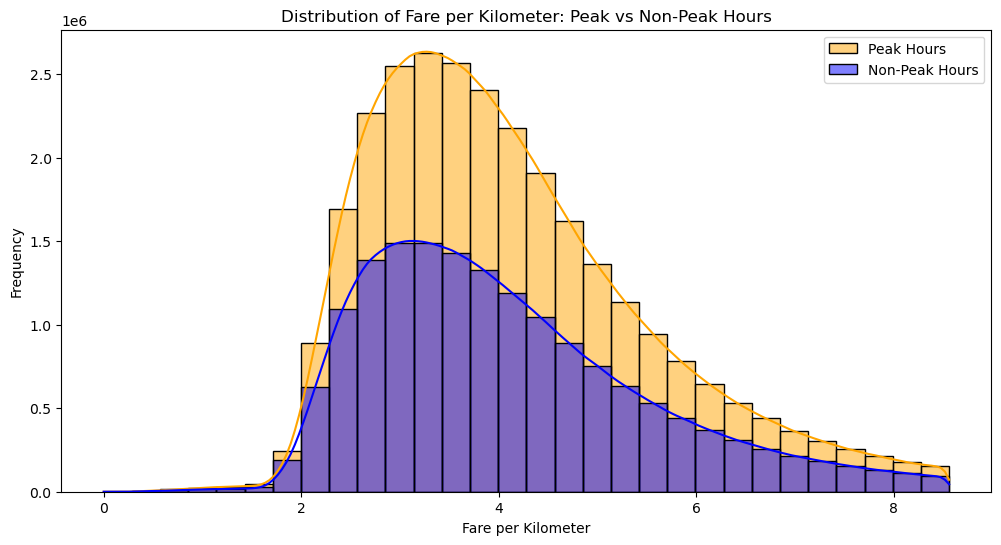

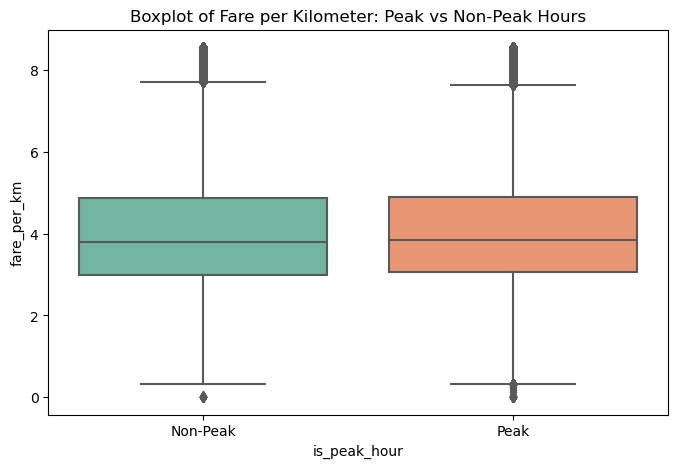

In [9]:
# Morning (7 AM - 10 AM), late afternoon/evening (4 PM - 8 PM), 
# and weekend nights (Sunday and Saturday nights: 8 PM - 11 PM)
def is_peak_hour(row):
    hour = row['pickup_hour']
    dayofweek = row['pickup_dayofweek']

    if (7 <= hour <= 10) or (16 <= hour <= 20):
        return True
    if (dayofweek in ["Sunday", "Saturday"]) and (hour >= 20 or hour < 23):
        return True
    return False

df['is_peak_hour'] = df.apply(is_peak_hour, axis=1)

# Separate peak and non-peak trips
peak_trips = df[df['is_peak_hour']]
non_peak_trips = df[~df['is_peak_hour']]

print("Summary Statistics - Peak Hours:")
print(peak_trips['fare_per_km'].describe(), '\n')

print("Summary Statistics - Non-Peak Hours:")
print(non_peak_trips['fare_per_km'].describe(), '\n')

plt.figure(figsize=(12, 6))
sns.histplot(peak_trips['fare_per_km'], bins=30, color='orange', label='Peak Hours', kde=True)
sns.histplot(non_peak_trips['fare_per_km'], bins=30, color='blue', label='Non-Peak Hours', kde=True)
plt.title("Distribution of Fare per Kilometer: Peak vs Non-Peak Hours")
plt.xlabel("Fare per Kilometer")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_peak_hour', y='fare_per_km', palette='Set2')
plt.xticks([0, 1], ['Non-Peak', 'Peak'])
plt.title("Boxplot of Fare per Kilometer: Peak vs Non-Peak Hours")
plt.show()

In [10]:
from scipy.stats import ttest_rel

peak_trips = df[df['is_peak_hour'] == True]
non_peak_trips = df[df['is_peak_hour'] == False]

# Common pickup locations between peak and non-peak trips for comparisons
matched_trips = pd.merge(
    peak_trips, non_peak_trips,
    on=['pickup_longitude', 'pickup_latitude'],
    suffixes=('_peak', '_non_peak')
)

peak_fares = matched_trips['fare_per_km_peak']
non_peak_fares = matched_trips['fare_per_km_non_peak']

# Paired t-test
t_stat, p_value = ttest_rel(peak_fares, non_peak_fares)

print(f"Paired t-test Results:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in fare per km between peak and non-peak hours.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fare per km between peak and non-peak hours.")


Paired t-test Results:
T-statistic: 25.247, P-value: 0.000
Reject the null hypothesis: Significant difference in fare per km between peak and non-peak hours.


As shown above, the hypothesis is rejected 

Therefore, there is a significant difference in fare per km between peak and non-peak hours.

takeaways>

1) Revenue dynamics and demand patterns in a day

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

4th Hypothesis -  Inclusion-Exclusion Principle and T-Test for cab ride Characteristics by Zone Overlaps

Null Hypothesis (H0): There are no significant fare differences based on overlapping pickup zones.

Alternative Hypothesis (H1): There are significant differences in fares due to overlapping zones.


This is multi-dimensional hypothesis, we would be using longitude and latitude of pick-up location's bins to create zone identifiers and then use T-Test if zone has impact on fare or not

Experiment:  The Multi-Dimensional T- test experiment to test validity of this hypothesis

Reasoning:  
1) Each set is roughly a normal distribution, given that sample sizes are large.
2) Each fare observation should be independent of others
3) Creating zones, helps to see/visualize co-relation

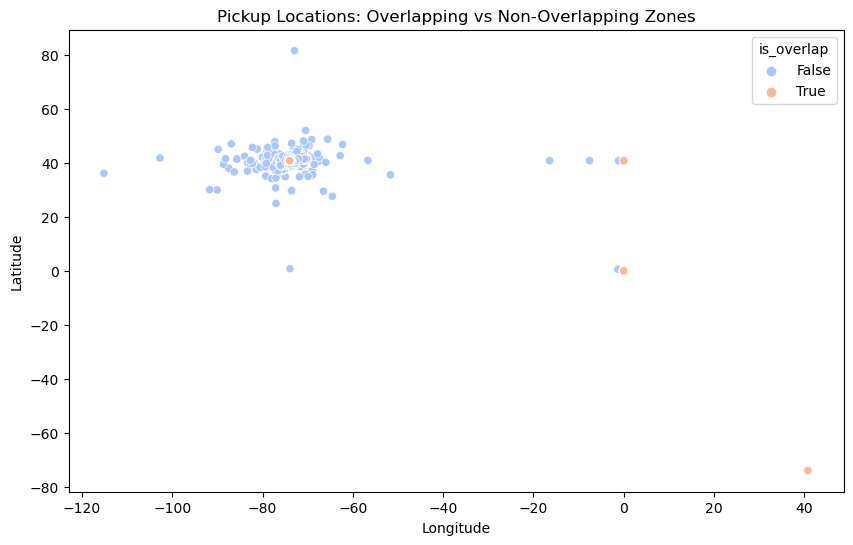

Average Fare Comparison:
   is_overlap  fare_amount
0       False     7.890717
1        True     8.744025


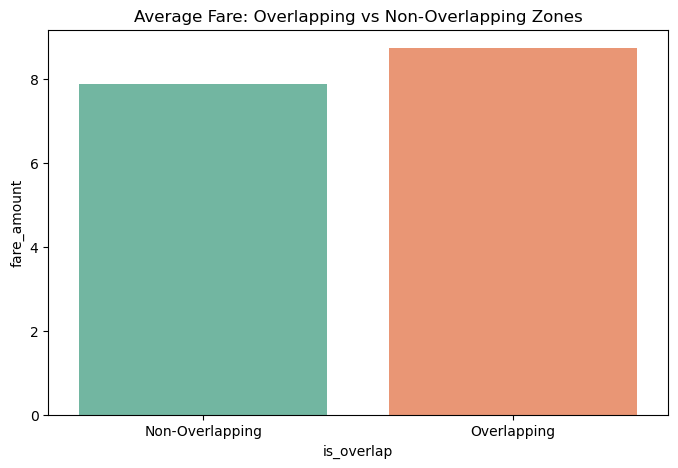

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df['lat_bin'] = np.floor(df['pickup_latitude'] / 0.01) * 0.01
df['lon_bin'] = np.floor(df['pickup_longitude'] / 0.01) * 0.01

# Latitude and Longitude bins as a zone identifier
df['zone'] = df['lat_bin'].astype(str) + "_" + df['lon_bin'].astype(str)

# Zones with Multiple Trips
zone_counts = df.groupby('zone')['key'].count().reset_index(name='trip_count')
overlapping_zones = zone_counts[zone_counts['trip_count'] > 1]['zone']

df['is_overlap'] = df['zone'].isin(overlapping_zones)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pickup_longitude', y='pickup_latitude', hue='is_overlap', palette='coolwarm')
plt.title("Pickup Locations: Overlapping vs Non-Overlapping Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

avg_fares = df.groupby('is_overlap')['fare_amount'].mean().reset_index()
print("Average Fare Comparison:")
print(avg_fares)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fares, x='is_overlap', y='fare_amount', palette='Set2')
plt.xticks([0, 1], ['Non-Overlapping', 'Overlapping'])
plt.title("Average Fare: Overlapping vs Non-Overlapping Zones")
plt.show()

In [12]:
# T-Test for Fare Differences
overlap_fares = df[df['is_overlap']]['fare_amount']
non_overlap_fares = df[~df['is_overlap']]['fare_amount']

t_stat, p_value = ttest_ind(overlap_fares, non_overlap_fares, equal_var=False)

print(f"\nT-Test Results:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

unique_zones = df.drop_duplicates(subset=['zone'])
unique_avg_fare = unique_zones['fare_amount'].mean()
print(f"\nAverage Fare After Inclusion-Exclusion Adjustment: {unique_avg_fare:.2f}")

alpha = 0.05

# Hypothesis testing logic
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H0).")
    print("There are significant differences in fares due to overlapping zones.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0).")
    print("There is no sufficient evidence to conclude significant fare differences.")




T-Test Results:
T-statistic: 18.379, P-value: 0.000

Average Fare After Inclusion-Exclusion Adjustment: 7.66

Conclusion: Reject the null hypothesis (H0).
There are significant differences in fares due to overlapping zones.


As shown above, the hypothesis is rejected 

Therefore, there is a significant difference in fare due to overlapping of zones. 

This presence of overlapping zones likely indicates areas with higher trip density, where multiple pickup points are geographically close.
Such areas could experience higher demand and this affects fair price.

takeaways>

1) The geographic overlap zones affect fare.
2) Identification of high demand regions

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

5th Hypothesis - The fare amount of taxi rides is influenced by both the year of the trip and the number of passengers.

Null Hypothesis (H0): There is no significant interaction effect between the year of the trip and the number of passengers on the fare amount.

Alternative Hypothesis (H1): There is a significant interaction effect between the year of the trip and the number of passengers on the fare amount.


Experiment:  The two-way ANOVA test with ols experiment to test validity of this hypothesis

Reasoning:  
1) Studies of the individual effects of each variable
2) Interaction effects, helping us determine if the relationship between one variable and fare amount varies at different levels of the other variable

Summary Statistics:
                                  count      mean       std   min  25%  50%  \
pickup_year passenger_count                                                  
2009        1                4915876.0  8.073699  3.442488  2.50  5.3  7.3   
            2                1161537.0  8.337467  3.564793  2.50  5.7  7.5   
            3                 333972.0  8.385587  3.579281  2.50  5.7  7.7   
            4                 161865.0  8.525542  3.601059  2.50  5.7  7.7   
            5                 627011.0  8.133690  3.469933  2.50  5.3  7.3   
            6                  31528.0  8.158196  3.527757  2.50  5.3  7.3   
2010        1                4752120.0  8.033868  3.434565  0.01  5.3  7.3   
            2                1090204.0  8.287928  3.562113  0.01  5.7  7.3   
            3                 316623.0  8.332539  3.568439  0.01  5.7  7.3   
            4                 154473.0  8.476767  3.609979  0.01  5.7  7.7   
            5                 579750.0  8.1

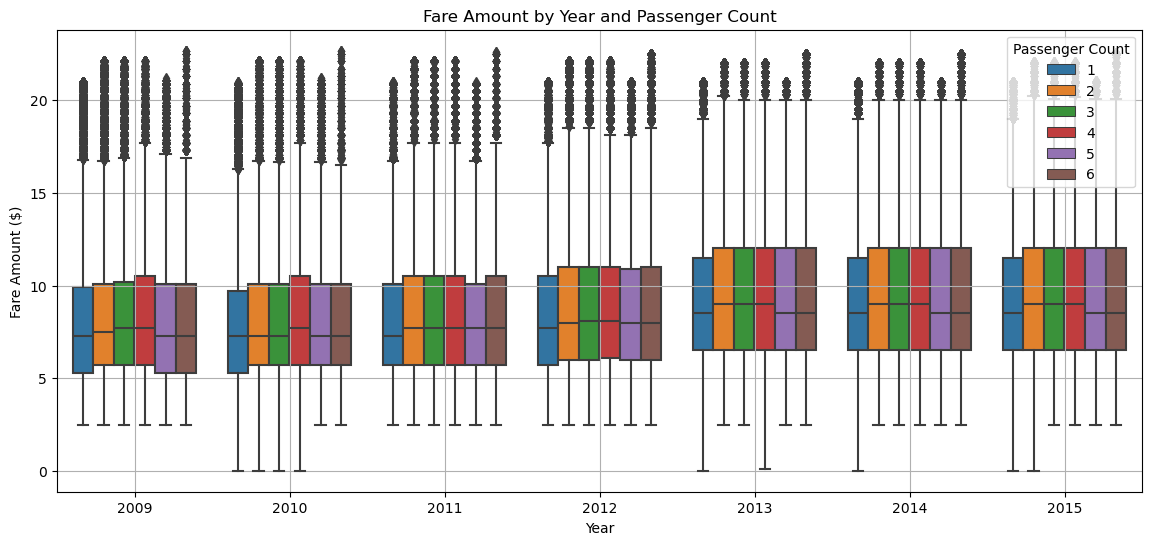

/tmp/ipykernel_188274/1283716883.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='pickup_year', y='fare_amount', hue='passenger_count', data=df, ci='sd', markers='o', linestyles='-')


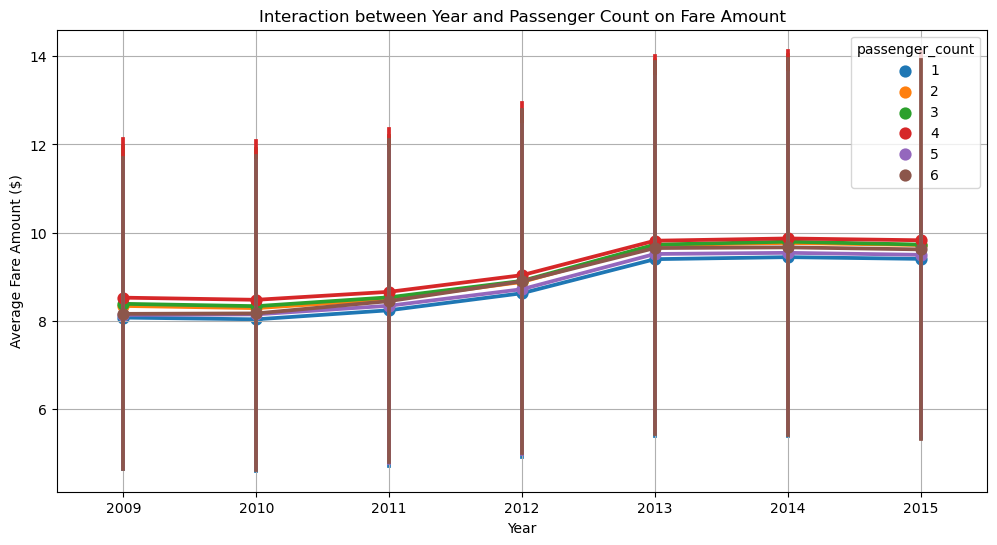

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


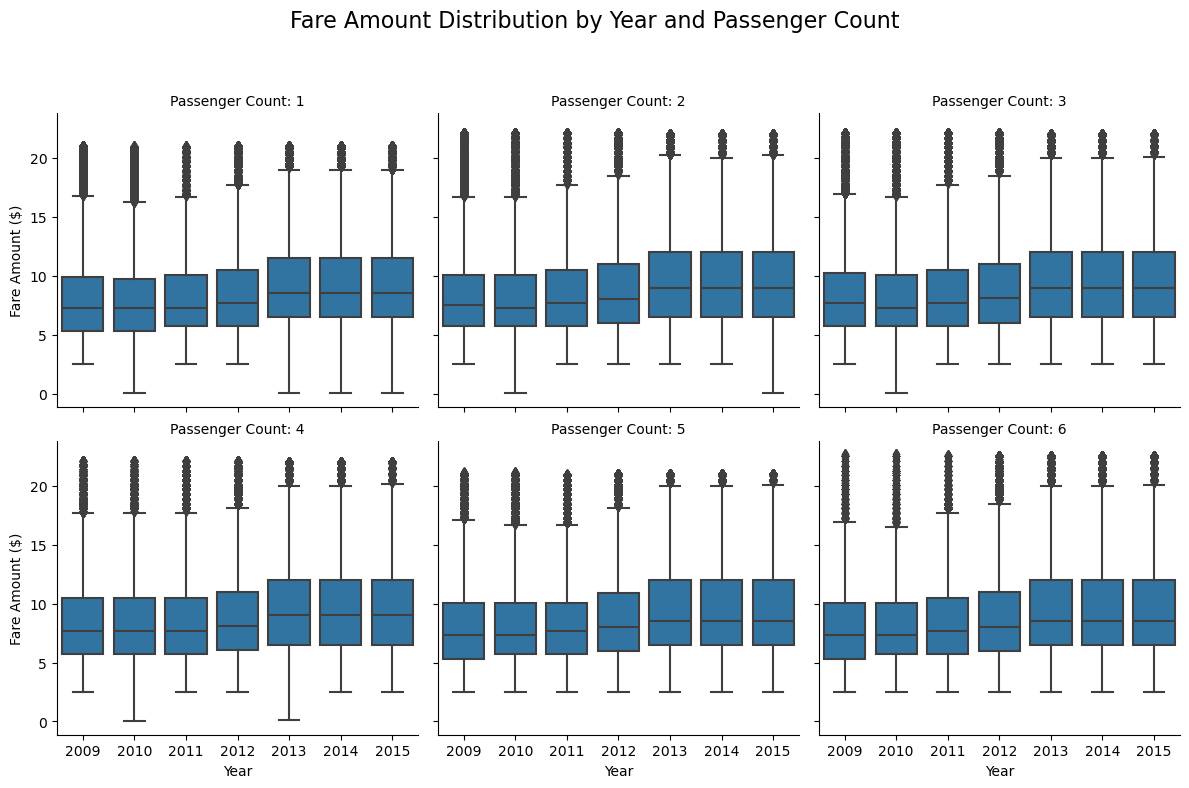

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


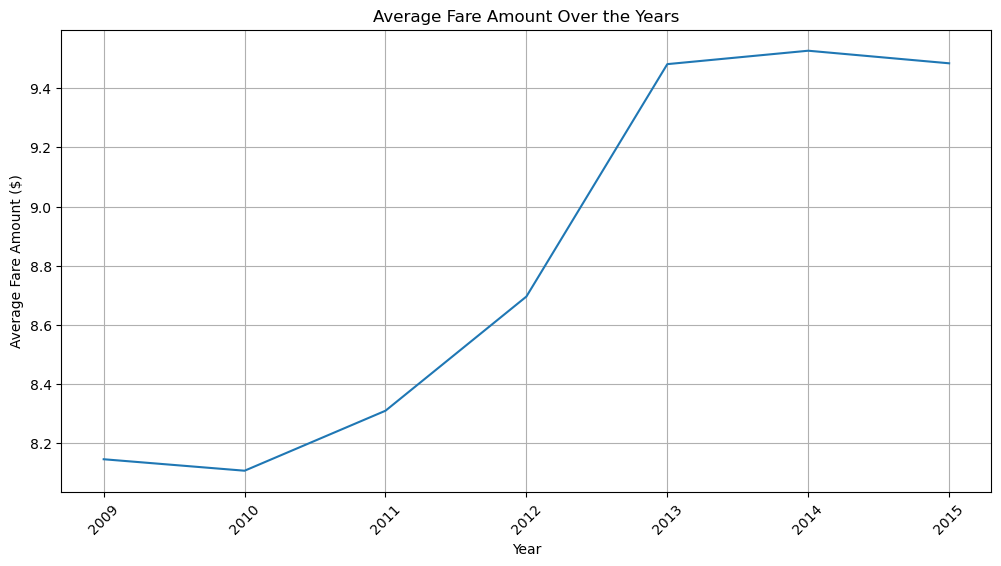

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

summary_stats = df.groupby(['pickup_year', 'passenger_count'])['fare_amount'].describe()
print("Summary Statistics:\n", summary_stats)

plt.figure(figsize=(14, 6))
sns.boxplot(x='pickup_year', y='fare_amount', hue='passenger_count', data=df)
plt.title('Fare Amount by Year and Passenger Count')
plt.xlabel('Year')
plt.ylabel('Fare Amount ($)')
plt.legend(title='Passenger Count', loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='pickup_year', y='fare_amount', hue='passenger_count', data=df, ci='sd', markers='o', linestyles='-')
plt.title('Interaction between Year and Passenger Count on Fare Amount')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount ($)')
plt.grid()
plt.show()

g = sns.FacetGrid(df, col='passenger_count', col_wrap=3, height=4)
g.map(sns.boxplot, 'pickup_year', 'fare_amount')
g.set_axis_labels('Year', 'Fare Amount ($)')
g.set_titles('Passenger Count: {col_name}')
g.fig.suptitle('Fare Amount Distribution by Year and Passenger Count', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

average_fare_by_year = df.groupby('pickup_year')['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_fare_by_year, x='pickup_year', y='fare_amount')
plt.title('Average Fare Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Ensure 'pickup_year' is categorical for ANOVA
df['pickup_year'] = df['pickup_year'].astype('category')

# Two-Way ANOVA
model = ols('fare_amount ~ pickup_year * passenger_count', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Results:\n", anova_table)

# Check for significance
alpha = 0.05
if anova_table['PR(>F)']['pickup_year'] < alpha:
    print("Reject the null hypothesis: Year has a significant effect on fare amount.")
else:
    print("Fail to reject the null hypothesis: Year does not have a significant effect on fare amount.")

if anova_table['PR(>F)']['passenger_count'] < alpha:
    print("Reject the null hypothesis: Passenger count has a significant effect on fare amount.")
else:
    print("Fail to reject the null hypothesis: Passenger count does not have a significant effect on fare amount.")

if anova_table['PR(>F)']['pickup_year:passenger_count'] < alpha:
    print("Reject the null hypothesis: There is a significant interaction effect between year and passenger count on fare amount.")
else:
    print("Fail to reject the null hypothesis: There is no significant interaction effect between year and passenger count on fare amount.")


Two-Way ANOVA Results:
                                    sum_sq          df              F  \
pickup_year                  1.598449e+07         6.0  188210.704731   
passenger_count              2.385703e+05         1.0   16854.397965   
pickup_year:passenger_count  1.246257e+03         6.0      14.674160   
Residual                     6.341278e+08  44799557.0            NaN   

                                   PR(>F)  
pickup_year                  0.000000e+00  
passenger_count              0.000000e+00  
pickup_year:passenger_count  7.715079e-17  
Residual                              NaN  
Reject the null hypothesis: Year has a significant effect on fare amount.
Reject the null hypothesis: Passenger count has a significant effect on fare amount.
Reject the null hypothesis: There is a significant interaction effect between year and passenger count on fare amount.


As shown above, the hypothesis is rejected 

There is a significant interaction effect between year and passenger count on fare amount.

takeaways>

1) Segmentation of Fare Adjustments with year and no of passengers 
2) The affect of financial year on revenue

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

6th Hypothesis: Canonical Correlation Analysis (CCA) Between Seasonal Variables (pickup_year, pickup_month) and Trip Fare Components (fare_amount, fare_per_km, trip_distance_km)

Null Hypothesis (H0): There is no correlation between seasonal variables and fare components.

Alternative Hypothesis (H1): Seasonal variables and fare components are significantly correlated.

Experiment:  The Canonical Correlation Analysis (CCA), experiment to test validity of this hypothesis

Reasoning:  
1) Evaluates the linear relationships between two multidimensional variable sets
2) Dimensional Reduction explores multivariate relationship  .

  pickup_year  pickup_month  fare_amount  fare_per_km  trip_distance_km
0        2009             6          4.5     4.365694          1.030764
1        2012             4          7.7     2.750717          2.799270
2        2010             3          5.3     2.651118          1.999157
3        2012            11          7.5     4.820650          1.555807
4        2012            12          9.0     7.181434          1.253232


/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


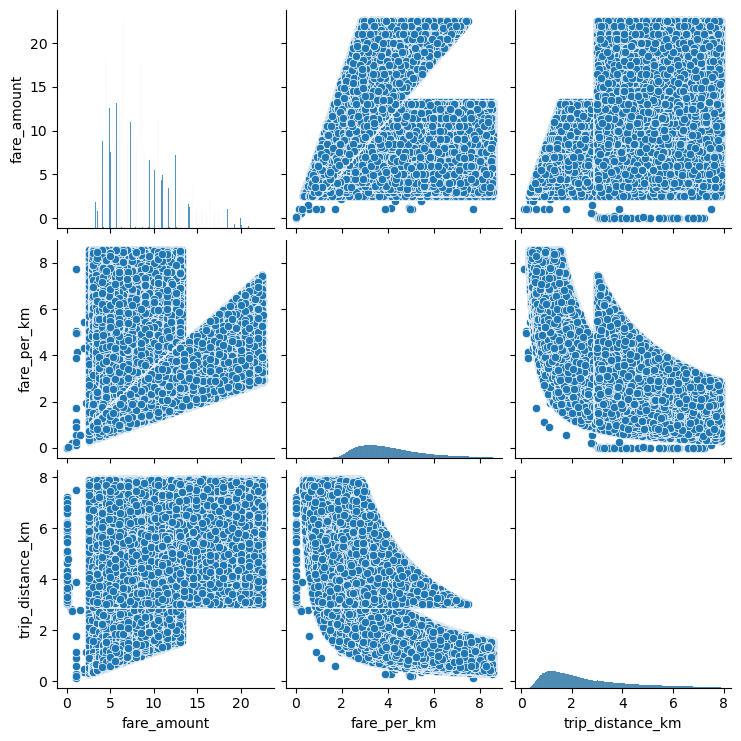

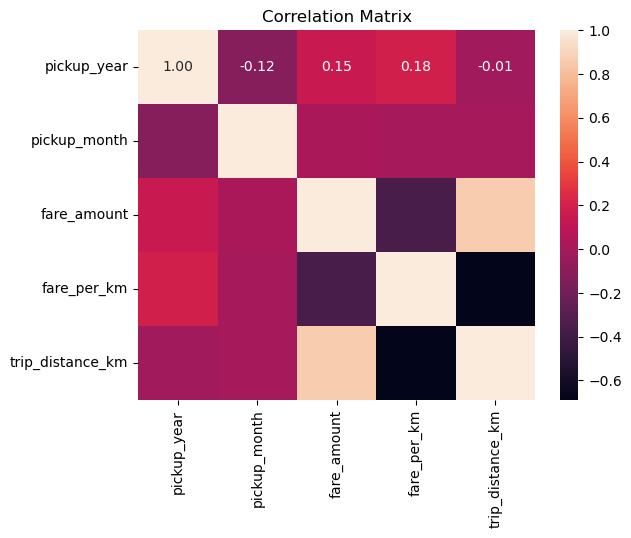

Canonical Correlations:
 [[ 3.24116318e-01  4.93714477e-14]
 [-5.14920246e-08  1.25952929e-02]]
P-values for Canonical Correlations:
 [0.8949486123985901, 0.9998413585978899]
H0 is supported for Canonical Variable 1: No significant correlation
H0 is supported for Canonical Variable 2: No significant correlation


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from scipy.stats import pearsonr

data = df[['pickup_year', 'pickup_month', 'fare_amount', 'fare_per_km', 'trip_distance_km']]

print(data.head())

sns.pairplot(data[['fare_amount', 'fare_per_km', 'trip_distance_km']])
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

X = data[['pickup_year', 'pickup_month']]
Y = data[['fare_amount', 'fare_per_km', 'trip_distance_km']]

cca = CCA(n_components=2)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)

canonical_corr = np.corrcoef(X_c.T, Y_c.T)[:X_c.shape[1], X_c.shape[1]:]

print("Canonical Correlations:\n", canonical_corr)

p_values = []
for i in range(canonical_corr.shape[0]):
    p_val = 1 - pearsonr(X_c[:, i], Y_c[:, i])[0]**2
    p_values.append(p_val)

print("P-values for Canonical Correlations:\n", p_values)

alpha = 0.05
for i, p_val in enumerate(p_values):
    if p_val < alpha:
        print(f"H1 is supported for Canonical Variable {i + 1}: Significant correlation")
    else:
        print(f"H0 is supported for Canonical Variable {i + 1}: No significant correlation")


So the hypothesis is supported. 

Therefore, there is no correlation between seasonal variables and fare components.

takeaways>

1) The seasonal variables determine Predictive Patterns.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------